


# Project: Investigate a Dataset - [TMDb Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

##### The analysis is conducted for a data set  that contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue


##### We will try to understand what kinds of properties are associated with movies that have high revenues...


In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline


In [153]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0



Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)



## Data Wrangling


In [154]:
# Load data and see the first 5 rows
df = pd.read_csv("tmdb-movies.csv")
print(df.head())


       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [155]:
# Find the number of movies (rows) and their associated characteristics(columns)
df.shape

(10866, 21)

In [156]:
# looking for missing values if exists
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [157]:
# number of duplicate rows
df.duplicated().sum()

1

In [158]:
# data type for each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object


## Data Cleaning


In [159]:
# Removing duplicates 
df.drop_duplicates(inplace= True)

In [160]:
# We  will not need the id", "imdb_id", "original_title", "homepage", "overview" columns in our data analysis , so we can drop these columns.
df.drop(["id", "imdb_id", "original_title", "homepage", "overview"], axis=1, inplace=True)


In [161]:
# Replacing zeros in columns that we will perform our analysis on with nan values, and then dropping all nan values exist in our dataset.
df["revenue"]= df["revenue"].replace(0, np.NAN)
df["budget"] = df["budget"].replace(0, np.NAN)
df["runtime"] = df["runtime"].replace(0, np.NAN)
df["release_year"] = df["release_year"].replace(0, np.NAN)
df["vote_count"] = df["vote_count"].replace(0, np.NAN)
df["vote_average"] = df["vote_average"].replace(0, np.NAN)


In [162]:
# Dropping NaNs
df.dropna(inplace=True)

In [163]:
# Reviewing the shape of the dataset after deleting NaNs
df.shape

(3445, 16)

<a id='eda'></a>
## Exploratory Data Analysis

### creating a histogram for various variables 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb17d544400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb17c74fa20>]], dtype=object)

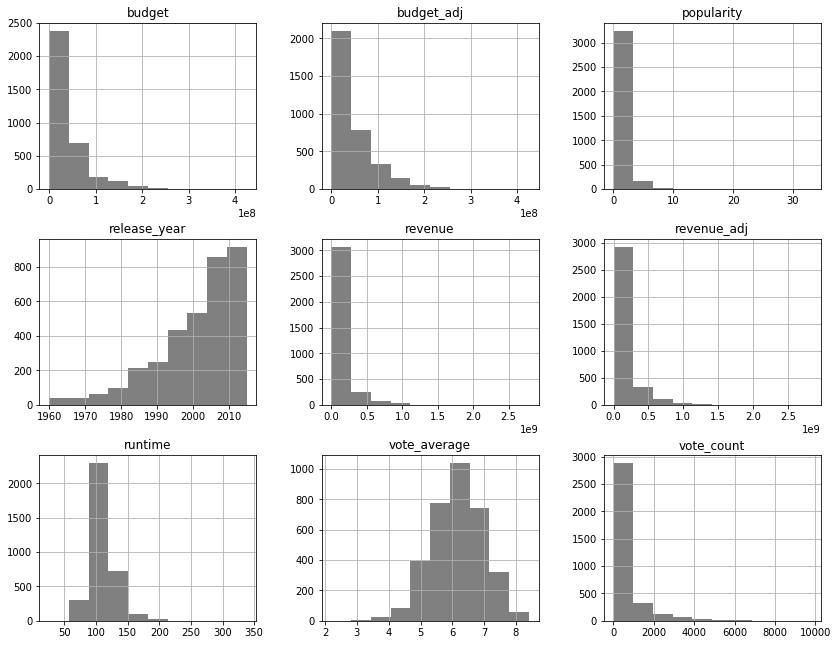

In [164]:
# creating a histogram for various columns variables and checking for their skewness
df.hist(figsize=(14, 11), color= "grey")



##### The most occuring vote average was 6
##### Slightly more than 90%(or 10000) of the movies had a vote count from 0 to 1000
##### Slightly More than 8000 movies had a runtime from 100 to less than 200, and  slightly more than 2000 has a runtime less than 100
##### More movies are relased from year to year
##### Slightly more than 90%(or 10000) of the movies had a revenue between 0 - 0.25 le9  , and Slightly less than 90%(or 10000) of them had a budget between 0 - 0.5 le8


###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

##### calculating useful statistics on the dataset numerical columns

In [165]:
print(df.describe())

        popularity        budget       revenue      runtime   vote_count  \
count  3445.000000  3.445000e+03  3.445000e+03  3445.000000  3445.000000   
mean      1.268127  3.937705e+07  1.166624e+08   109.403193   573.448186   
std       1.533870  4.329284e+07  1.830498e+08    19.694966   915.245414   
min       0.010335  1.000000e+00  2.000000e+00    26.000000    10.000000   
25%       0.507078  1.100000e+07  1.697446e+07    96.000000    86.000000   
50%       0.876503  2.500000e+07  5.203489e+07   106.000000   238.000000   
75%       1.464555  5.100000e+07  1.382591e+08   119.000000   631.000000   
max      32.985763  4.250000e+08  2.781506e+09   338.000000  9767.000000   

       vote_average  release_year    budget_adj   revenue_adj  
count   3445.000000   3445.000000  3.445000e+03  3.445000e+03  
mean       6.184383   2001.038897  4.680125e+07  1.484486e+08  
std        0.788992     11.379944  4.568443e+07  2.237649e+08  
min        2.200000   1960.000000  9.693980e-01  2.861934e+

###### our data set is for movies relased between 1960 and 2015
###### the maximum budget and revenue were 4.250000e+08, 2.781506e+09 respectively, and the minimun ones were 1.000000e+00,  4.300000e+01.
###### the mean of the revenue was 3.982332e+07 with a standard diviation of 1.170035e+08

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### plotting summarized statistics about average revenue on the y axis and its relation with some of  the other valriables.

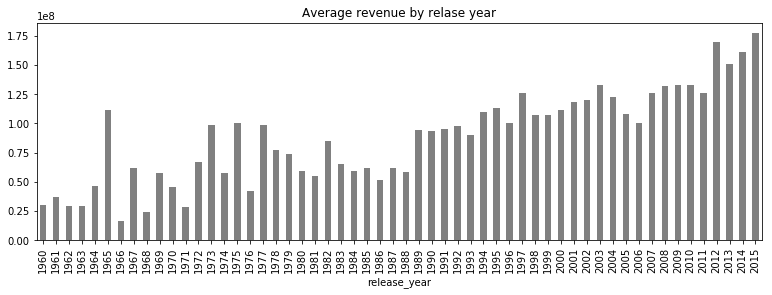

In [166]:
df.groupby(["release_year"])["revenue"].mean().plot(kind="bar",title="Average revenue by relase year",color="grey",figsize=[13,4])

##### It seems that revenue tends to be greater year over year, with the time interval 1989-2015 to have the highest amounts generated.

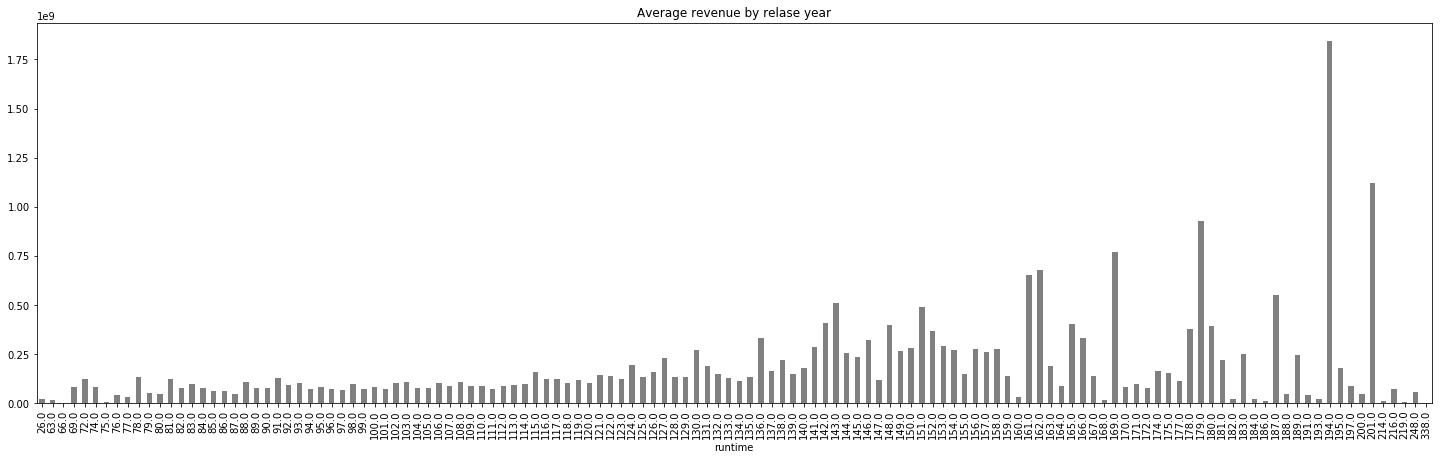

In [167]:
df.groupby(["runtime"])["revenue"].mean().plot(kind="bar",title="Average revenue by relase year",color="grey",figsize=[25,7])


##### Higher average revenue are associated with movies that have a runtime between almost 2-3 hours, and movies that have a runtime less than 2 hours tend to generate lower average revenue.

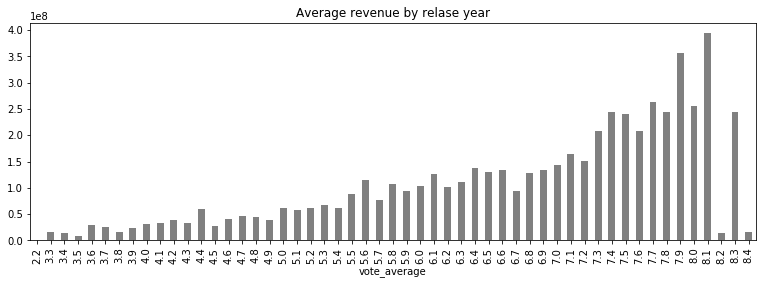

In [168]:
df.groupby(["vote_average"])["revenue"].mean().plot(kind="bar",title="Average revenue by relase year",color="grey",figsize=[13,4])

##### Movies that have higher vote average are often associated with higher revenues

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analysing the correlation between revenue and some other variables by creating scatterplots of revenue against different variables.

Text(0,0.5,'revenue')

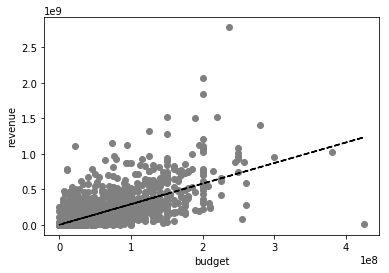

In [169]:
# correlation between revenue and budget
x=df["budget"]
y =df["revenue"]
plt.scatter(x,y,color="grey")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")
plt.xlabel("budget")
plt.ylabel("revenue")

Text(0,0.5,'revenue')

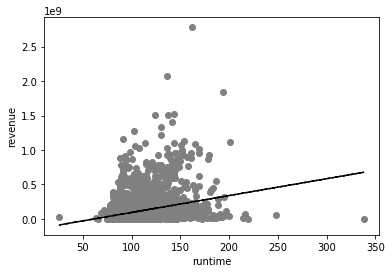

In [170]:
# correlation between revenue and runtime
x=df["runtime"]
y =df["revenue"]
plt.scatter(x,y,color="grey")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")
plt.xlabel("runtime")
plt.ylabel("revenue")


Text(0,0.5,'revenue')

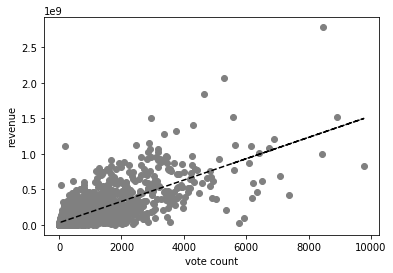

In [171]:
# correlation between revenue and vote count
x=df["vote_count"]
y =df["revenue"]
plt.scatter(x,y,color="grey")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")
plt.xlabel("vote count")
plt.ylabel("revenue")


Text(0,0.5,'revenue')

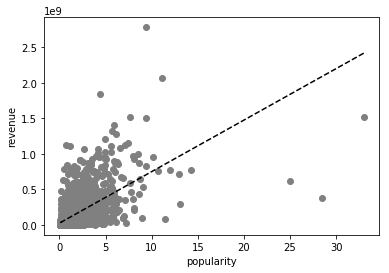

In [172]:
# correlation between revenue and popularity
x=df["popularity"]
y =df["revenue"]
plt.scatter(x,y,color="grey")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")
plt.xlabel("popularity")
plt.ylabel("revenue")

### It turns out that revenue has a positive correlation between budget, runtime, vote count and popularity.

###### ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<a id='conclusions'></a>
## Conclusions

### we can tell that some variables have a positive impact on revenue such as the budget of the movie and its runtime ,as revenue tends to increase when these variables increase as observed from scatterplot graphs.
#### In addition, revenue tends to be greater year over year, with the time interval 1989-2015 to have the highest amounts generated.
#### Higher average revenue are associated with movies that have a runtime between almost 2-3 hours, and movies that have a runtime less than 2 hours tend to generate lower average revenue.
#### lastely, movies that have higher vote average are often associated with higher revenues.


In [173]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0